# Book Project

## Bunch O' Packages:

In [133]:
import pandas as pd
import numpy as np
import string
from nltk import pos_tag, RegexpParser
from nltk.tokenize import PunktSentenceTokenizer, word_tokenize
import re
#import sys  #imports packages with pip instead of using command line
#!{sys.executable} -m pip install textblob
from wordcloud import WordCloud
#import ftfy
import matplotlib.pyplot as plt
from collections import Counter
from itertools import groupby as gb
from textblob import TextBlob


## Preprocess Data

### Load Data

In [134]:
## Load Data

def read_file(num):
    text = ''
    with open('data/page'+ str(num) + '.txt', 'rt', encoding="utf8") as file_in:
        for line in file_in:
            text = text + line
    return text

# Our data is going to be stored in book_content string
book_content =''
for i in range(1,37):
    book_content += read_file(i)

# Check it's all there
print("Example section of the book:")
print()
print(book_content[0:127])

# If there's any weird formatting stuff, this could fix it(if not skip):
#fix_book_content = ftfy.fix_text(book_content)
#print(fix_book_content)
#print(type(fix_book_content))

Example section of the book:

He’d stopped trying to bring her back.

She only came back when she felt like it, in dreams and lies and broken-down déjà vu.




The book is split into different sections, from Eleanor and Park's perspectives.  This makes it relatively simple to separate them.  Will then change the format of the quoatation marks to make it easier to find them in the text later on.

In [135]:
## Split Eleanor and Park's perspectives

eleanor_text = []
park_text = []
split_text = re.split(r'(\nPark\n|\nEleanor\n)', book_content) #split is formatted by Eleanor or Park's name with a newline before and after
park_text.append(split_text[0]) #first section is untagged Park perspective
split_text = split_text[1:] #everything else is in the normal format
#print(split_text)

for i in range(len(split_text)):
    if split_text[i] == "\nPark\n":
        park_text.append(split_text[i+1])
    if split_text[i] == "\nEleanor\n":
            eleanor_text.append(split_text[i+1])
    else: continue
## Check:
#print("Park:")
#print(park_text)
#print("Eleanor:")
#print(eleanor_text)


#force my own end quotaion mark for parse_text function to work
def fix_quote(text):
    string = ""
    if type(text) == str:
        for i in range(len(text)):
                if text[i] == "’" and text[i+1].isspace():
                    string += text[i].replace("’", '"') #change end quotations
                else: string += text[i]
        string = string.replace("’", "") #get rid of ’ so contraction words don't split up
        return string
    else:
        for section in text:
            for i in range(len(section)):
                if section[i] == "’" and section[i+1].isspace():
                    string += section[i].replace("’", '"') #change end quotations
                else: string += section[i]
        string = string.replace("’", "") #get rid of ’ so contraction words don't split up
        return string
park_string = fix_quote(park_text)
eleanor_string = fix_quote(eleanor_text)
all_string = fix_quote(book_content)
## Check new quotations
print("Example Section with New Quotations:")
print()
print(all_string[987:1496])


Example Section with New Quotations:



He could get back to New Wave in November, after he got his drivers license. His parents had already said Park could have his moms Impala, and hed been saving up for a new tape deck. Once he started driving to school, he could listen to whatever he wanted or nothing at all, and hed get to sleep in an extra twenty minutes.

‘That doesnt exist," somebody shouted behind him.

‘It so f**king does," Steve shouted back.

‘Drunken-monkey style, man, its a real f**king thing. You can kill somebody with it …"




## Tokens all around

Then I separated each sentence in the text and each word in that sentence using the tokenization method.

In [136]:
def tokenize_sent_text(text):
    sentence_tokenizer = PunktSentenceTokenizer(text)
    sentence_tokenized = sentence_tokenizer.tokenize(text) #get tokenized sentences
    return sentence_tokenized
 
park_sent = tokenize_sent_text(park_string)
eleanor_sent = tokenize_sent_text(eleanor_string)
all_sent = tokenize_sent_text(all_string)
#print(all_sent)

def tokenize_lower(text):
    word_tokenized = []
    for sentence in text:
        tokenized = word_tokenize(sentence)
        tokenized = [word.lower() for word in tokenized] # make letters lowercased
        word_tokenized.append(tokenized)
    return word_tokenized

all_words = tokenize_lower(all_sent)
park_tokenized = tokenize_lower(park_sent)
eleanor_tokenized = tokenize_lower(eleanor_sent)
#print(all_words)

def delete_ad_text_sent(text):
    for sent in text:
        for word in sent:
            if word == "advertisement":
                sent.remove(word)
            if word == "chapter": #also take out chapter tag, can keep in the numbers for placement
                sent.remove(word)
    return text

all_tokenized = delete_ad_text_sent(all_words)
park_tokenized = delete_ad_text_sent(park_tokenized)
eleanor_tokenized = delete_ad_text_sent(eleanor_tokenized)
print("Example Tokenized Section:")
print()
print(all_tokenized[:10])

# The site I got the text from inserted the word "advertisement" various places, we don't want this affecting the data
def delete_ad_text(text):
    for word in text:
        if word == "advertisement":
            text.remove(word)
        if word == "chapter": #also take out chapter tag
            text.remove(word)
    return text
park_tokenized = delete_ad_text(park_tokenized)
eleanor_tokenized = delete_ad_text(eleanor_tokenized)
all_tokenized = delete_ad_text(all_tokenized)

def sent_to_words(t):
    words = []
    for sent in t:
        for word in sent:
            words.append(word)
    return words
park_tokenized_words = sent_to_words(park_tokenized)
eleanor_tokenized_words = sent_to_words(eleanor_tokenized)
all_tokenized_words = sent_to_words(all_tokenized)

# Check:
#print(len(eleanor_tokenized))
#print(len(eleanor_tokenized))
#print(park_tokenized)

Example Tokenized Section:

[['hed', 'stopped', 'trying', 'to', 'bring', 'her', 'back', '.'], ['she', 'only', 'came', 'back', 'when', 'she', 'felt', 'like', 'it', ',', 'in', 'dreams', 'and', 'lies', 'and', 'broken-down', 'déjà', 'vu', '.', 'like', ',', 'hed', 'be', 'driving', 'to', 'work', ',', 'and', 'hed', 'see', 'a', 'girl', 'with', 'red', 'hair', 'standing', 'on', 'the', 'corner', '–', 'and', 'hed', 'swear', ',', 'for', 'half', 'a', 'choking', 'moment', ',', 'that', 'it', 'was', 'her', '.'], ['then', 'hed', 'see', 'that', 'the', 'girls', 'hair', 'was', 'more', 'blond', 'than', 'red', '.'], ['and', 'that', 'she', 'was', 'holding', 'a', 'cigarette', '…', 'and', 'wearing', 'a', 'sex', 'pistols', 't-shirt', '.'], ['eleanor', 'hated', 'the', 'sex', 'pistols', '.'], ['eleanor', '…', 'standing', 'behind', 'him', 'until', 'he', 'turned', 'his', 'head', '.'], ['lying', 'next', 'to', 'him', 'just', 'before', 'he', 'woke', 'up', '.'], ['making', 'everyone', 'else', 'seem', 'drabber', 'and', '

Next, separate the words spoken(dialog) vs. the words thought(narration) to ensure we get the thoughts of each character and not what's said to them.

In [137]:
## Separate what's said to them (dialog) vs. what they think (narration)
def parse_text(t):
    open_q = '‘'
    close_q = "''"
    found_q = False # this will be used to break the while loop below
    # current will hold words until an open quote is found
    current = []
    
    parsed_dialog = [] 
    parsed_narrative = []
    length = len(t)
    i = 0

    while i < length:
        word = t[i]
        
        if word != open_q and word != close_q:
            current.append(word)

        elif word == open_q or word == close_q:
            parsed_narrative.append(current)

            current = []
            current.append(word)

            while found_q == False and i < length-1:
                i += 1
                if t[i] != close_q:
                    current.append(t[i])
                else:
                    current.append(t[i])
                    parsed_dialog.append(current)
                    current = []
                    found_q = True
        
        found_q = False
        i += 1
        
    return (parsed_dialog, parsed_narrative)
##last sentences aren't included using this function

park_dialog, park_narrative = parse_text(park_tokenized_words)
eleanor_dialog, eleanor_narrative = parse_text(eleanor_tokenized_words)
all_dialog, all_narrative = parse_text(all_tokenized_words)

def split_sent(t):
    sent_list = []
    for sent in t:
        k = [list(sent) for i, sent in gb(sent, lambda item: item=='.')]
        for i in k:
            if len(i) > 1:
                sent_list.append(i)
    return (sent_list)


park_narrative = split_sent(park_narrative)
eleanor_narrative = split_sent(eleanor_narrative)
all_narrative = split_sent(all_narrative)
print("Example Narrative Sentences:")
print(all_narrative[:2])

Example Narrative Sentences:
[['hed', 'stopped', 'trying', 'to', 'bring', 'her', 'back'], ['she', 'only', 'came', 'back', 'when', 'she', 'felt', 'like', 'it', ',', 'in', 'dreams', 'and', 'lies', 'and', 'broken-down', 'déjà', 'vu']]


I decided to not only do a comparison of the two main characters: Park and Eleanor, but to also compare the desciptors used for each of their mothers.

In [138]:
## Comparison of their Moms

# find all sentences with "mom"
mom_list = ['mom', 'mother', 'moms', 'mothers']
park_poss = ['his', 'park', 'parks']
eleanor_poss = ['her', 'eleanor', 'eleanors']
mom_sentences = []
for sentence in all_narrative:
    for word in sentence:
        if word in mom_list:
            mom_sentences.append(sentence)
            break
#print(len(mom_sentences))
#print(mom_sentences)
park_mom = []
eleanor_mom = []
for sentence in mom_sentences:
    for i in range(len(sentence)):
        if sentence[i] in mom_list and sentence[i-1] in park_poss:
            park_mom.append(sentence)
        elif sentence[i] in mom_list and sentence[i-1] in eleanor_poss:
            eleanor_mom.append(sentence)
#print("Eleanor's Mom Sentences:")
#print(eleanor_mom)

mom_dict = {'park_mom': park_mom, 'eleanor_mom': eleanor_mom}
print("Example Park's Mom Dictionary Sentences:")
print(mom_dict['park_mom'][:3])

Example Park's Mom Dictionary Sentences:
[['his', 'parents', 'had', 'already', 'said', 'park', 'could', 'have', 'his', 'moms', 'impala', ',', 'and', 'hed', 'been', 'saving', 'up', 'for', 'a', 'new', 'tape', 'deck'], ['parks', 'mom', 'had', 'been', 'cutting', 'tinas', 'hair', 'since', 'grade', 'school'], ['she', 'reminded', 'park', 'of', 'a', 'scarecrow', 'or', 'one', 'of', 'the', 'trouble', 'dolls', 'his', 'mom', 'kept', 'on', 'her', 'dresser']]


In [139]:
## Get Character sentences:
p_list = ['eleanor', 'park']
friends_list = ['denice', 'beebi']

def protagonist(n, p_list):
    protagonist_narrative = {}
    for p in p_list:
        protagonist_narrative[p] = []

    for i in n:
        for word in i:
            
            if word in p_list:
                if word == p_list[0]:
                    protagonist_narrative[p_list[0]].append(i)
                if word == p_list[1] :
                    protagonist_narrative[p_list[1]].append(i)          
    return protagonist_narrative


## Create Dictionaries
park_dict = protagonist(park_narrative, p_list)
eleanor_dict = protagonist(eleanor_narrative, p_list)
all_dict = protagonist(all_narrative, p_list)
friends_dict = protagonist(all_narrative, friends_list)

## Tag the words to their Part Of Speech (POS)

In [223]:
## Part of Speech Tags
def tagged_text(i):
    tagged = [pos_tag(word) for word in i]
    return tagged

def parse_tagged(protagonist_dict):
    tagged_dict = {}
    
    for k, v in protagonist_dict.items():
        tagged_dict[k] = tagged_text(v)
    return tagged_dict
    
# Call the function and save the results in a variable called tagged_dict.
park_tagged_dict = parse_tagged(park_dict)
eleanor_tagged_dict = parse_tagged(eleanor_dict)
all_tagged_dict = parse_tagged(all_dict)
friends_tagged_dict = parse_tagged(friends_dict)
mom_tagged_dict = parse_tagged(mom_dict)

# Let's see what these look like by printing the first two sentences in each key.
for p in friends_list:
        print("%s : " % p.title())
        print(friends_tagged_dict[p][:2])

Denice : 
[[('her', 'PRP$'), ('name', 'NN'), ('was', 'VBD'), ('denice', 'NN'), (',', ','), ('and', 'CC'), ('she', 'PRP'), ('looked', 'VBD'), ('too', 'RB'), ('young', 'JJ'), ('to', 'TO'), ('be', 'VB'), ('in', 'IN'), ('the', 'DT'), ('tenth', 'NN'), ('grade', 'NN')], [('denice', 'NN'), ('said', 'VBD')]]
Beebi : 
[[('eleanor', 'NN'), ('was', 'VBD'), ('pretty', 'RB'), ('sure', 'JJ'), ('her', 'PRP$'), ('name', 'NN'), ('was', 'VBD'), ('beebi', 'NN')], [('beebi', 'NN'), ('was', 'VBD'), ('what', 'WP'), ('eleanors', 'NNS'), ('mom', 'VBP'), ('would', 'MD'), ('call', 'VB')]]


## Get the Descriptive verbs and adverbs assigned to each character

In [224]:
def descriptor_verbs_adverbs(td):
    descriptor_words = {}
    descriptor_count = {}
    
    for k, v in td.items():
        # Create a key in the dictionary for the protagonist.
        descriptor_words[k] = []
        if k == 'eleanor_mom' or k == 'park_mom':
            for s in v:
                for i in range(len(s)-2):
               
                # Cases of NOUN - VERB (e.g. "Hermione explained")
                    if s[i][0] in mom_list and 'VB' in s[i+1][1]:
                        descriptor_words[k].append(s[i+1][0])
                        # Subset of cases where NOUN - VERB is followed by an ADVERB (e.g. 
                        #"Hermione explained patiently")
                        if 'RB' in s[i+2][1] or 'JJ' in s[i+2][1]:
                            descriptor_words[k].append(s[i+2][0])
        
            descriptor_count[k] = Counter(descriptor_words[k])
      
        
        else:
            # Loop through each sentence in the list
            for s in v:
                for i in range(len(s)):
                
                # Cases of VERB - NOUN (e.g. "said Ron")
                    if 'VB' in s[i][1]:
                        try:
                            if s[i+1][0] == k:
                                descriptor_words[k].append(s[i][0])
                            
                            # Subset of cases where VERB - NOUN is followed by an ADVERB (e.g. "said Ron angrily")
                                try:
                                    if 'RB' in s[i+2][1]:
                                        descriptor_words[k].append(s[i+2][0])
                                except:
                                    continue
                            
                        except:
                            continue
                        
                # Cases of NOUN - VERB (e.g. "Hermione explained")
                    if 'NN' in s[i][1]: 
                        try:
                            if 'VB' in s[i+1][1]:
                                descriptor_words[k].append(s[i+1][0])
                            # Subset of cases where NOUN - VERB is followed by an ADVERB (e.g. 
                            #"Hermione explained patiently")
                                try:
                                    if 'RB' in s[i+2][1]:
                                        descriptor_words[k].append(s[i+2][0])
                                except:
                                    continue
                            
                        except:
                            continue
        
            descriptor_count[k] = Counter(descriptor_words[k])
      
        
    return (descriptor_words, descriptor_count)

park_descriptor_words, park_descriptor_count= descriptor_verbs_adverbs(park_tagged_dict)
eleanor_descriptor_words, eleanor_descriptor_count= descriptor_verbs_adverbs(eleanor_tagged_dict)
all_descriptor_words, all_descriptor_count= descriptor_verbs_adverbs(all_tagged_dict)

mom_descriptor_words, mom_descriptor_count = descriptor_verbs_adverbs(mom_tagged_dict)
#print(mom_descriptor_count)
#print(all_descriptor_count['park'])

Then create list of the words that are only used to describe one character and not the others so that the comparison is more apparent.

In [193]:
def character_exclusive(dc, char):

    char_excl = []
    others = []
    
    for k, v in dc.items():
        if k != char:
            words = list(v.keys())
            others.extend(words)
            
    others = set(others)
    
    for word in list(dc[char].keys()):
        if word not in others:
            char_excl.append(word)
    return char_excl

def only_char_list(dc, char):
    excl_words = character_exclusive(dc, char)
    word_cloud_list = []
    for word in excl_words:
        multiplier = dc[char][word]
        word_cloud_list.extend([word for x in range(multiplier)])

    return word_cloud_list

eleanorinpark_excl = only_char_list(park_descriptor_count, 'eleanor')
parkinpark_excl = only_char_list(park_descriptor_count, 'park')
eleanorineleanor_excl = only_char_list(eleanor_descriptor_count, 'eleanor')
parkineleanor_excl = only_char_list(eleanor_descriptor_count, 'park')
all_park_excl = only_char_list(all_descriptor_count, 'park')
all_eleanor_excl = only_char_list(all_descriptor_count, 'eleanor')
park_mom_excl = only_char_list(mom_descriptor_count, 'park_mom')
park_mom_excl.remove('eleanor')
eleanor_mom_excl = only_char_list(mom_descriptor_count, 'eleanor_mom')
print("Park's Mom Exclusive List:")
print(park_mom_excl)
#print(denice_excl)

Park's Mom Exclusive List:
['korean', 'tried', 'so', 'so', 'so', 'were', 'were', 'here', 'here', 'answered', 'answered', 'opened', 'opened', 'opened', 'opened', 'say', 'say', 'smiled', 'broadly', 'loved', 'loved', 'out', 'exactly', 'practically', 'agitated', 'eighteen', 'did', 'offered', 'frowned', 'extra', 'asked', 'asked', 'asked', 'how', 'knowingly', 'put', 'pushed', 'wash', 'sat', 'sat', 'sat', 'sat', 'swooped', 'very', 'rubbed', 'non-negotiable', 'softly', 'always', 'disappeared', 'turned', 'insisted', 'do', 'still', 'called', 'when', 'ran', 'stopped']


## Visualize:

First we have the comparison of the way each main character describes themself.  After that we have how each main character describes the other, followed by the combination of the first two comparisons.  The last comparison is of the exclusive descriptors of each of the main characters' mom.

******************** Park from his Perspective ********************


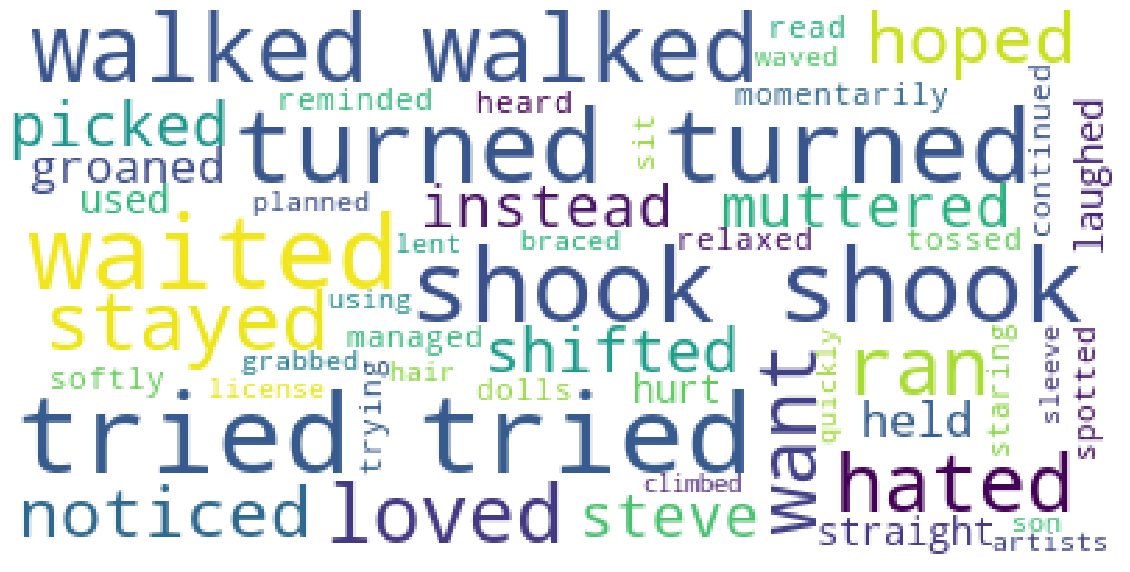

******************** Eleanor from her Perspective ********************


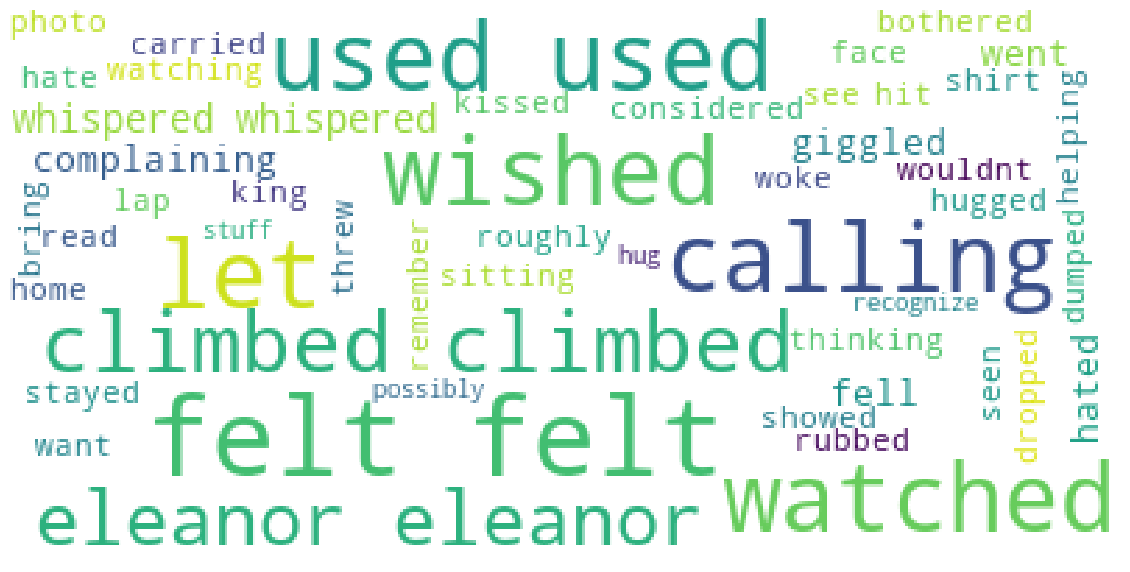

In [221]:
wc = WordCloud(background_color="white", 
               max_words=50, 
               min_font_size =5, 
               max_font_size=40, 
               relative_scaling = 0.4, 
               normalize_plurals= True)

fig_sz = (20,20)



# Park only from his perspective
print ("*" * 20, "Park from his Perspective", "*" * 20)
wc.generate(' '.join(parkinpark_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

# Eleanor from Eleanor
print ("*" * 20, "Eleanor from her Perspective", "*" * 20)
wc.generate(' '.join(eleanorineleanor_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()


In [227]:
print("Park from his Perspective:")
print(Counter(parkinpark_excl).most_common(20))
print()
print("Eleanor from her Perspective:")
print(Counter(eleanorineleanor_excl).most_common(20))

Park from his Perspective:
[('tried', 7), ('turned', 6), ('shook', 6), ('walked', 6), ('waited', 5), ('just', 3), ('hated', 3), ('ran', 3), ('loved', 3), ('want', 3), ('stayed', 3), ('hoped', 2), ('noticed', 2), ('picked', 2), ('shifted', 2), ('muttered', 2), ('instead', 2), ('steve', 2), ('groaned', 2), ('held', 2)]

Eleanor from her Perspective:
[('felt', 7), ('used', 5), ('climbed', 5), ('eleanor', 5), ('whispered', 5), ('calling', 4), ('…', 4), ('wished', 4), ('let', 4), ('watched', 4), ('hated', 3), ('complaining', 3), ('be', 3), ('only', 3), ('fell', 3), ('went', 3), ('giggled', 3), ('considered', 2), ('showed', 2), ('helping', 2)]


Park seems to describe himself more in a yearning way with words like: tried, waited, loved, want, hoped and with awkward movements like: turned, shook, ran, stayed, shifted, muttered, and groaned.

Eleanor describes herself in a yearning manner as well: calling, wished, watched but also with a few more negative words like used and complaining.

******************** Park from Eleanor's Perspective ********************


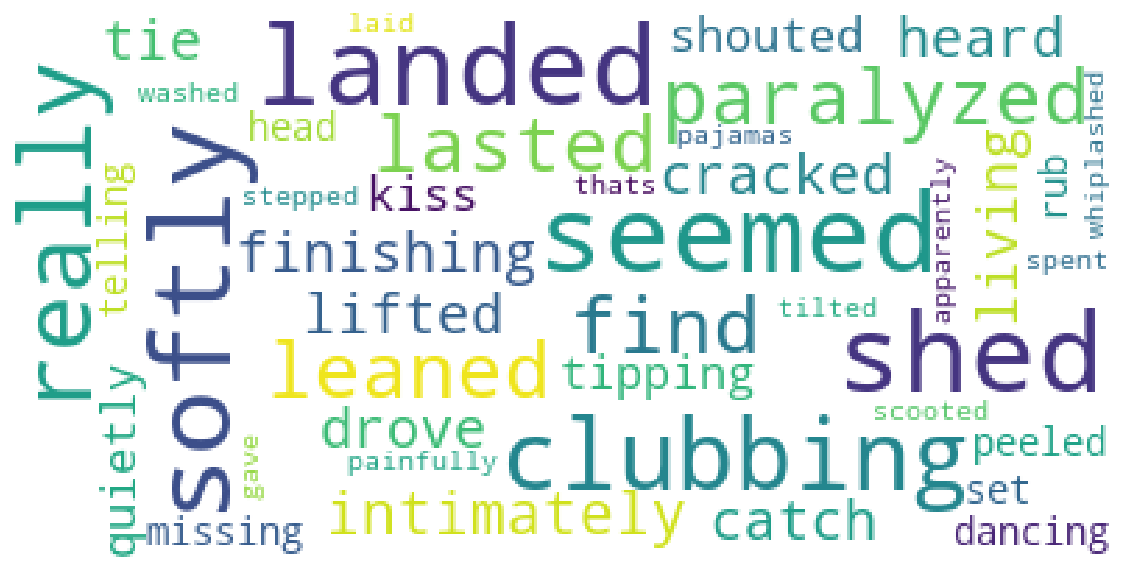

******************** Eleanor from Park's Perspective ********************


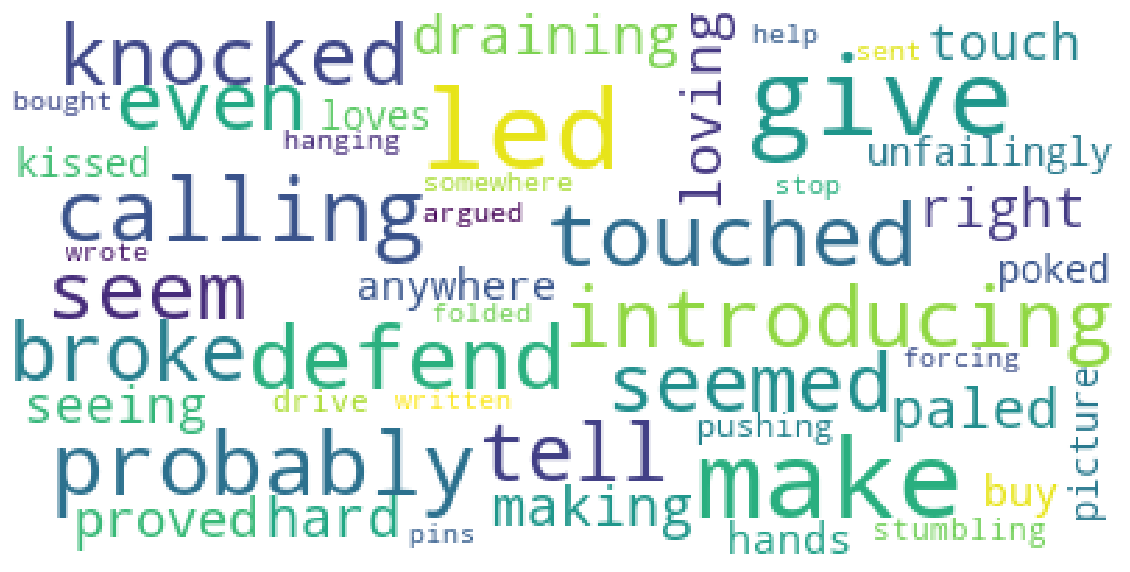

In [218]:
#Park from Eleanor
print ("*" * 20, "Park from Eleanor's Perspective", "*" * 20)
wc.generate(' '.join(parkineleanor_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

# Eleanor only from park's perspective
print ("*" * 20, "Eleanor from Park's Perspective", "*" * 20)
wc.generate(' '.join(eleanorinpark_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

plt.show()

In [229]:
print("Park from Eleanor's Perspective:")
print(Counter(parkineleanor_excl).most_common(20))
print()
print("Eleanor from Park's Perspective:")
print(Counter(eleanorinpark_excl).most_common(20))

Park from Eleanor's Perspective:
[('seemed', 3), ('softly', 3), ('landed', 3), ('shed', 3), ('clubbing', 2), ('really', 2), ('find', 1), ('leaned', 1), ('paralyzed', 1), ('lasted', 1), ('intimately', 1), ('finishing', 1), ('cracked', 1), ('tie', 1), ('catch', 1), ('drove', 1), ('heard', 1), ('lifted', 1), ('living', 1), ('tipping', 1)]

Eleanor from Park's Perspective:
[('make', 2), ('here', 2), ('led', 2), ('give', 2), ('touched', 1), ('calling', 1), ('probably', 1), ('defend', 1), ('introducing', 1), ('knocked', 1), ('seem', 1), ('seemed', 1), ('even', 1), ('tell', 1), ('broke', 1), ('draining', 1), ('hard', 1), ('making', 1), ('paled', 1), ('right', 1)]


Eleanor describes Park with intimate verbs like: softly, leaned, intimately and action words that describe the adventures they have like: landed, drove, living.

Park describes Eleanor with intimate verbs as well like: led, give, and touched as well as words that seem a little bossy or forceful like: make, calling, defend, knocked, broke, draining, and hard.

******************** Park from All ********************


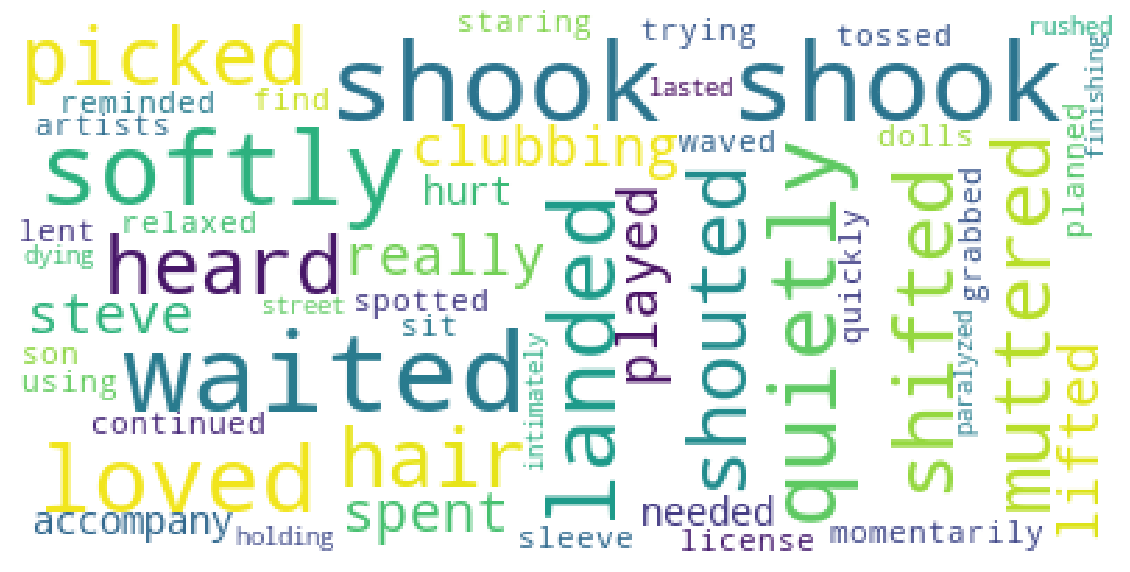

******************** Eleanor from All ********************


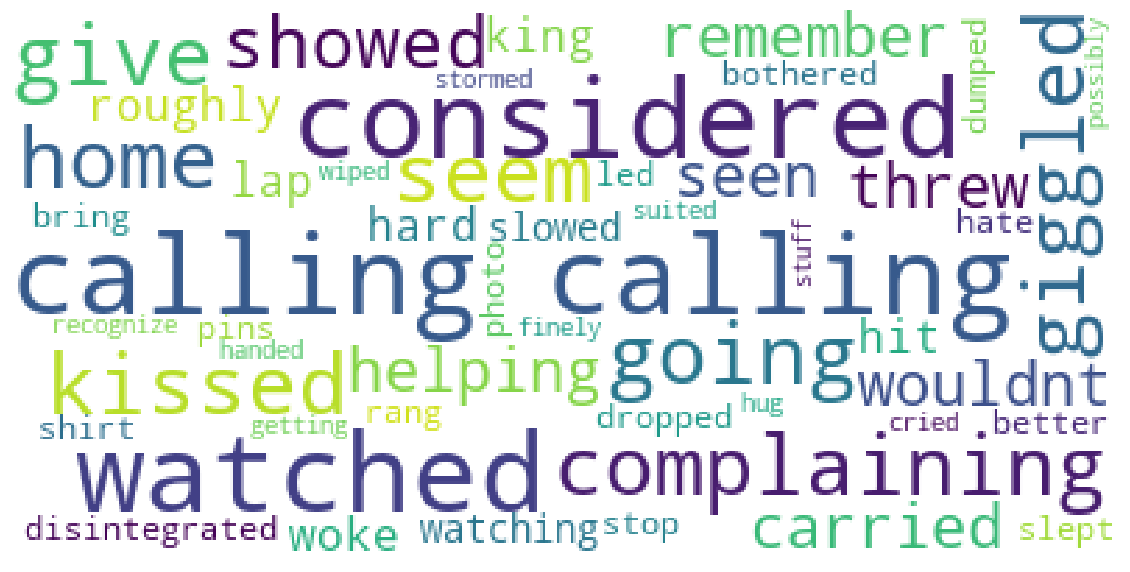

In [211]:
# Park from all
print ("*" * 20, "Park from All", "*" * 20)
wc.generate(' '.join(all_park_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

# Eleanor from all
print ("*" * 20, "Eleanor from All", "*" * 20)
wc.generate(' '.join(all_eleanor_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

In [230]:
print("Park:")
print(Counter(all_park_excl).most_common(20))
print()
print("Eleanor:")
print(Counter(all_eleanor_excl).most_common(20))

Park:
[('shook', 6), ('waited', 5), ('softly', 4), ('landed', 3), ('as', 3), ('quietly', 3), ('loved', 3), ('heard', 2), ('picked', 2), ('shifted', 2), ('hair', 2), ('muttered', 2), ('shouted', 2), ('clubbing', 2), ('lifted', 2), ('steve', 2), ('really', 2), ('spent', 2), ('played', 2), ('accompany', 2)]

Eleanor:
[('calling', 5), ('considered', 4), ('only', 4), ('watched', 4), ('complaining', 3), ('going', 3), ('kissed', 3), ('seem', 3), ('home', 3), ('giggled', 3), ('give', 3), ('showed', 2), ('helping', 2), ('seen', 2), ('wouldnt', 2), ('remember', 2), ('carried', 2), ('threw', 2), ('roughly', 2), ('hit', 2)]


Park's words show his gentleness such as: waited, softly, quietly, and muttered.

Eleanor's words seem less gentle: calling, complaining, threw, and roughly.

******************** Park's Mom ********************


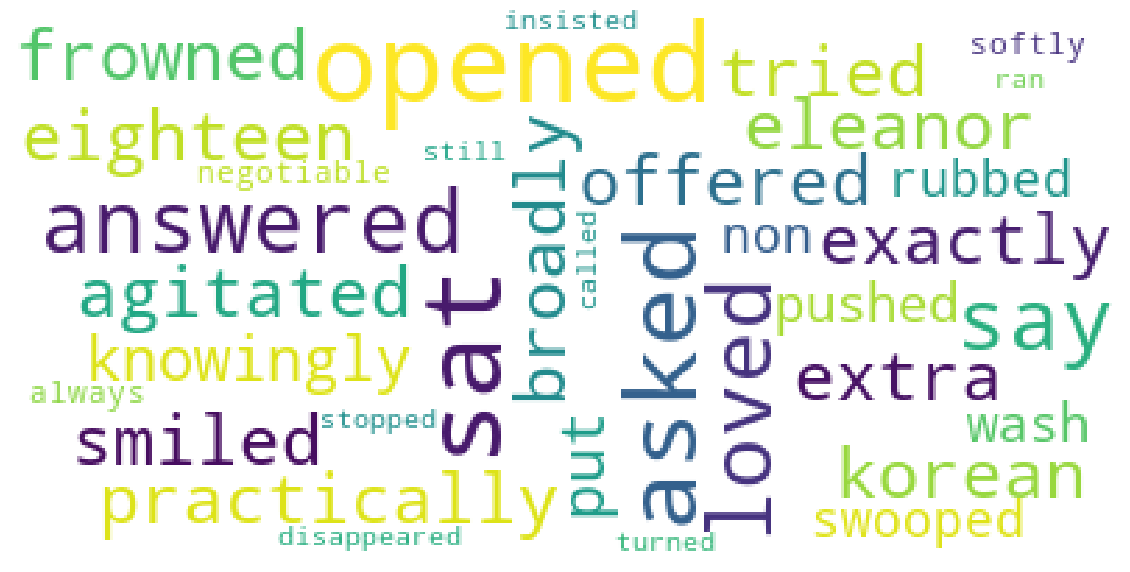

******************** Eleanor's Mom ********************


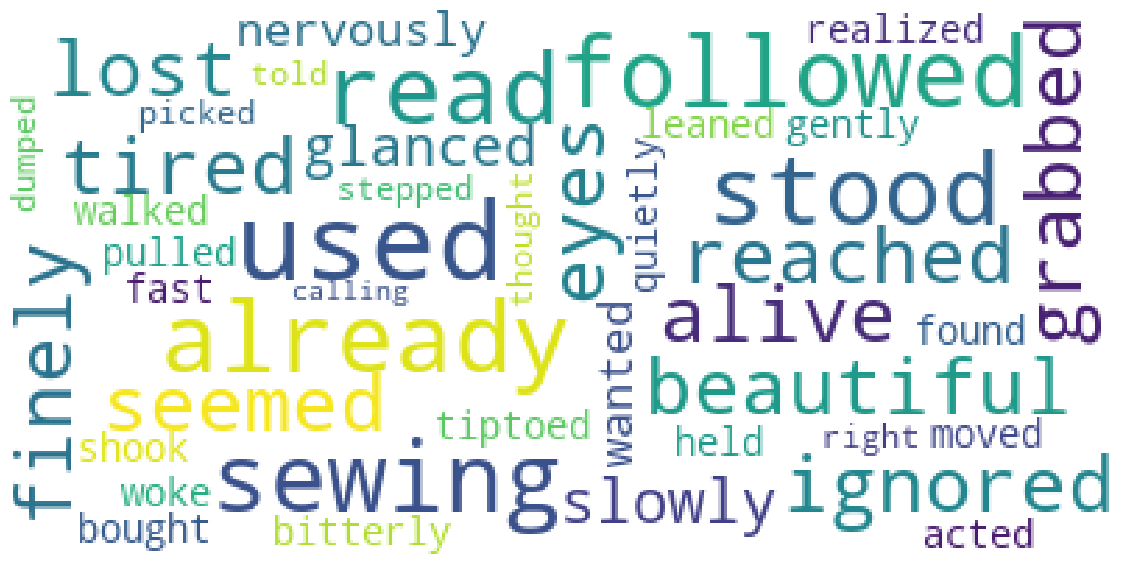

In [153]:
## Eleanor and Park's Mom Comparison

#Park's Mom
print ("*" * 20, "Park's Mom", "*" * 20)
wc.generate(' '.join(park_mom_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

#Eleanor's Mom
print ("*" * 20, "Eleanor's Mom", "*" * 20)
wc.generate(' '.join(eleanor_mom_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

In [231]:
print("Park's Mom:")
print(Counter(park_mom_excl).most_common(20))
print()
print("Eleanor's Mom:")
print(Counter(eleanor_mom_excl).most_common(20))

Park's Mom:
[('opened', 4), ('sat', 4), ('so', 3), ('asked', 3), ('were', 2), ('here', 2), ('answered', 2), ('say', 2), ('loved', 2), ('korean', 1), ('tried', 1), ('smiled', 1), ('broadly', 1), ('out', 1), ('exactly', 1), ('practically', 1), ('agitated', 1), ('eighteen', 1), ('did', 1), ('offered', 1)]

Eleanor's Mom:
[('used', 3), ('already', 2), ('stood', 2), ('sewing', 2), ('read', 2), ('followed', 2), ('beautiful', 1), ('finely', 1), ('reached', 1), ('tired', 1), ('lost', 1), ('ignored', 1), ('grabbed', 1), ('seemed', 1), ('alive', 1), ('eyes', 1), ('slowly', 1), ('glanced', 1), ('nervously', 1), ('wanted', 1)]


Park's mom's words show her hospitality: asked, tried, smiled, and offered.

Eleanor's mom's words shows her attractiveness: beautiful, finely but also her jadedness and anxiety: used, tired, lost, ignored, nervously.

Inspiration and method from: https://github.com/eleanorstrib/potter/blob/master/bossy.ipynb and from codeacademy.com